## Problem Definition and understanding


### build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables

## Data fields:

<ul>
<li>id - a unique identifier for each trip</li>
<li>vendor_id - a code indicating the provider associated with the trip record</li>
<li>pickup_datetime - date and time when the meter was engaged</li>
<li>dropoff_datetime - date and time when the meter was disengaged</li>
<li>passenger_count - the number of passengers in the vehicle (driver entered value)</li>
<li>pickup_longitude - the longitude where the meter was engaged</li>
<li>pickup_latitude - the latitude where the meter was engaged</li>
<li>dropoff_longitude - the longitude where the meter was disengaged</li>
<li>dropoff_latitude - the latitude where the meter was disengaged</li>
<li>store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip</li>
<li>trip_duration - duration of the trip in seconds</li>
    </ul>

### Dataset Description
The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

## Data Wrangling 


In [1]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [82]:
#load train and val dataset
df=pd.read_csv(r"D:\Data Science\course_ML_mostafa_saad\projects\project-taxi-trip-duration\datasets\train.csv")

In [83]:
#to display all columns and rows
pd.options.display.max_columns=None


In [84]:
#check for data loaded
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [85]:
#let's display some information about dataset like number of not null value and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   dropoff_datetime    1000000 non-null  object 
 4   passenger_count     1000000 non-null  int64  
 5   pickup_longitude    1000000 non-null  float64
 6   pickup_latitude     1000000 non-null  float64
 7   dropoff_longitude   1000000 non-null  float64
 8   dropoff_latitude    1000000 non-null  float64
 9   store_and_fwd_flag  1000000 non-null  object 
 10  trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 83.9+ MB


<strong>Note :</strong><br>
can convert pickup_datetime  from data tyoe object to data time To extract some information from those columns<br>
Drop dropoff dateimte from your table. It is used to compute the duration

In [86]:
print(f'train dataset has {df.shape[0]} rows and {df.shape[1]} columns  ')


train dataset has 1000000 rows and 11 columns  


In [87]:
#let's display some statistic information about numerical columns
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,1.534793,1.665353,-73.973475,40.750947,-73.973421,40.751829,9.548850e+02
std,0.498788,1.315723,0.065404,0.033745,0.065432,0.035782,3.882070e+03
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,1.000000e+00
25%,1.000000,1.000000,-73.991852,40.737372,-73.991341,40.735928,3.970000e+02
50%,2.000000,1.000000,-73.981728,40.754131,-73.979767,40.754551,6.620000e+02
75%,2.000000,2.000000,-73.967346,40.768379,-73.963036,40.769833,1.074000e+03
max,2.000000,7.000000,-61.335529,51.881084,-61.335529,43.921028,2.227612e+06


<ul>
 <li>vendor id has  two value 1,2 </li>
 <li>passenger count has 8 value from zero to 7 </li>
 <li>trip duration has outlear values </li>
</ul>

In [88]:
skew_df=df.skew().to_frame().rename(columns={0: 'skew'})
skew_df.sort_values(by='skew',ascending=False).style.background_gradient()

,skew
trip_duration,202.555754
pickup_latitude,16.821486
passenger_count,2.125937
vendor_id,-0.139510
dropoff_latitude,-13.633751
pickup_longitude,-383.018403
dropoff_longitude,-386.828587


trip_duration column is positive skew <br> pickup_longitude and dropoff_longitude are negative skew

## Data cleaning 

In [89]:
#check for null value on data frame
df.isna().sum().any()

False

In [90]:
#check for any dublicated value on data frame
df.duplicated().any()

False

Note:<br>
<strong>Training data set don't have any null value or duplicate rows</strong>

###  Remove Trips That Have Improbable Features

In [91]:
#### in trip duration
(df['trip_duration']/(60*60)).describe()

count    1000000.000000
mean           0.265246
std            1.078353
min            0.000278
25%            0.110278
50%            0.183889
75%            0.298333
max          618.781111
Name: trip_duration, dtype: float64

#### Some trips exceeded 24 hours, which is unreasonable


#### try to ignore (remove) trips that has trip duration greater than 22 hour 

In [92]:
df = df.drop(df[df['trip_duration'] >=(22*60*60)].index)

#### There were some trips that were less than two minutes long

In [93]:
df = df.drop(df[df['trip_duration'] <= (2*60)].index)

In [94]:
#### in trip duration
df['passenger_count'].value_counts().sort_values().to_frame().style.background_gradient()

,passenger_count
0,6
4,19171
6,32637
3,40329
5,52639
2,141434
1,693128


In [15]:
df = df.drop(df[df['passenger_count']==0 ].index)

in summary :<br>
<tab>    removed 20662 trips 

## analysis 

### store_and_fwd_flag 

Text(0.5, 1.0, 'A comparison of the number of trips he made between two vendors ')

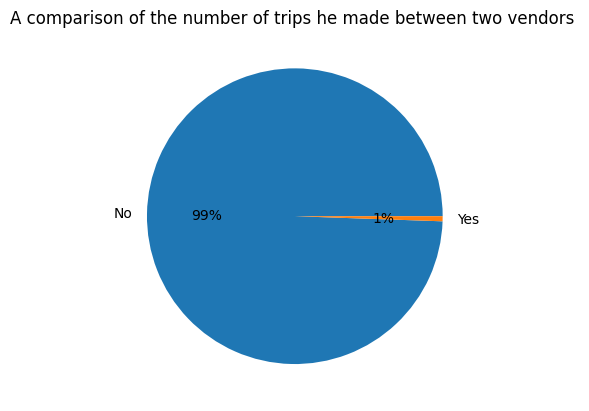

In [99]:
label=['No','Yes']
store_and_fwd_flag=df['store_and_fwd_flag'].value_counts()
plt.pie(store_and_fwd_flag,labels= label, autopct='%.0f%%') 
plt.title('A comparison of the number of trips he made between two vendors ')

Text(0.5, 1.0, 'store_and_fwd_flag and trip_duration ')

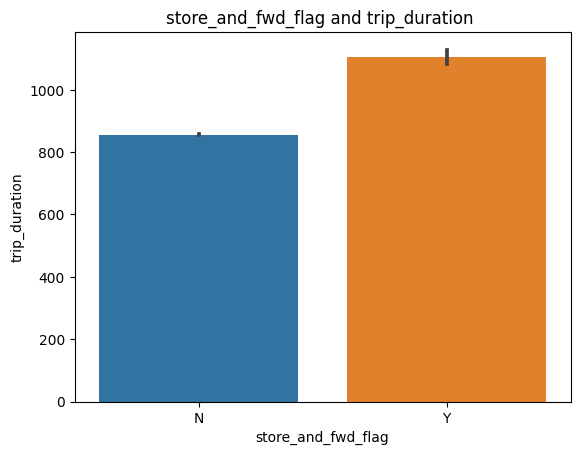

In [102]:
sns.barplot(data=df,x='store_and_fwd_flag',y='trip_duration')
plt.title("store_and_fwd_flag and trip_duration ")

#### We will divide the data into numeric features and categorical features

### anlysis numeric features 

In [16]:
# select numeric features from dataset
numeric_features=df.select_dtypes(['int64','float64'])
numeric_features.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,1,-73.985611,40.735943,-73.980331,40.760468,1040
1,2,1,-73.978394,40.764351,-73.991623,40.749859,827
2,2,5,-73.989059,40.744389,-73.973381,40.748692,614
3,2,2,-73.990326,40.731136,-73.991264,40.748917,867
4,1,4,-73.789497,40.646675,-73.987137,40.759232,4967


#### We will divide the digital data into continuous data and discrete data

### analysis discrete features

In [17]:
discrete_features=['vendor_id','passenger_count']

In [18]:
vendor_id=df['vendor_id'].value_counts().reset_index()
vendor_id.columns=['vendor_id','value_counts']
vendor_id.sort_values(by='value_counts',ascending=False).style.background_gradient()

,vendor_id,value_counts
0,2,523949
1,1,455389


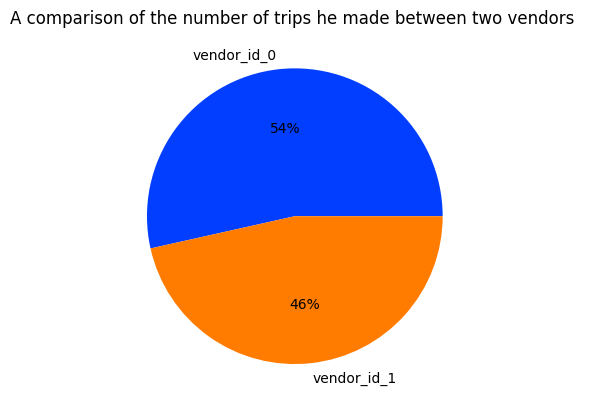

In [19]:
palette_color = sns.color_palette('bright') 
label=['vendor_id_0','vendor_id_1']
plt.pie(df['vendor_id'].value_counts(),labels= label,colors=palette_color, autopct='%.0f%%') 
plt.title('A comparison of the number of trips he made between two vendors ')
plt.show() 

In [20]:
passenger_count=df['passenger_count'].value_counts().reset_index()
passenger_count.columns=['passenger_count','value_counts']
passenger_count=passenger_count.sort_values(by='value_counts',ascending=False)
passenger_count.style.background_gradient()

,passenger_count,value_counts
0,1,693128
1,2,141434
2,5,52639
3,3,40329
4,6,32637
5,4,19171


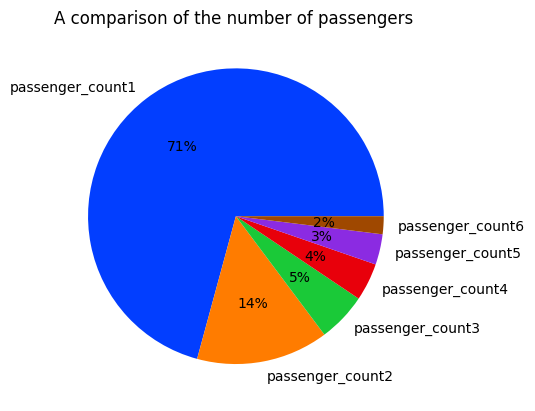

In [21]:
palette_color = sns.color_palette('bright') 
label=['passenger_count1','passenger_count2','passenger_count3','passenger_count4','passenger_count5','passenger_count6']
plt.pie(passenger_count['value_counts'],labels= label,colors=palette_color, autopct='%.0f%%') 
plt.title('A comparison of the number of passengers ')
plt.show() 

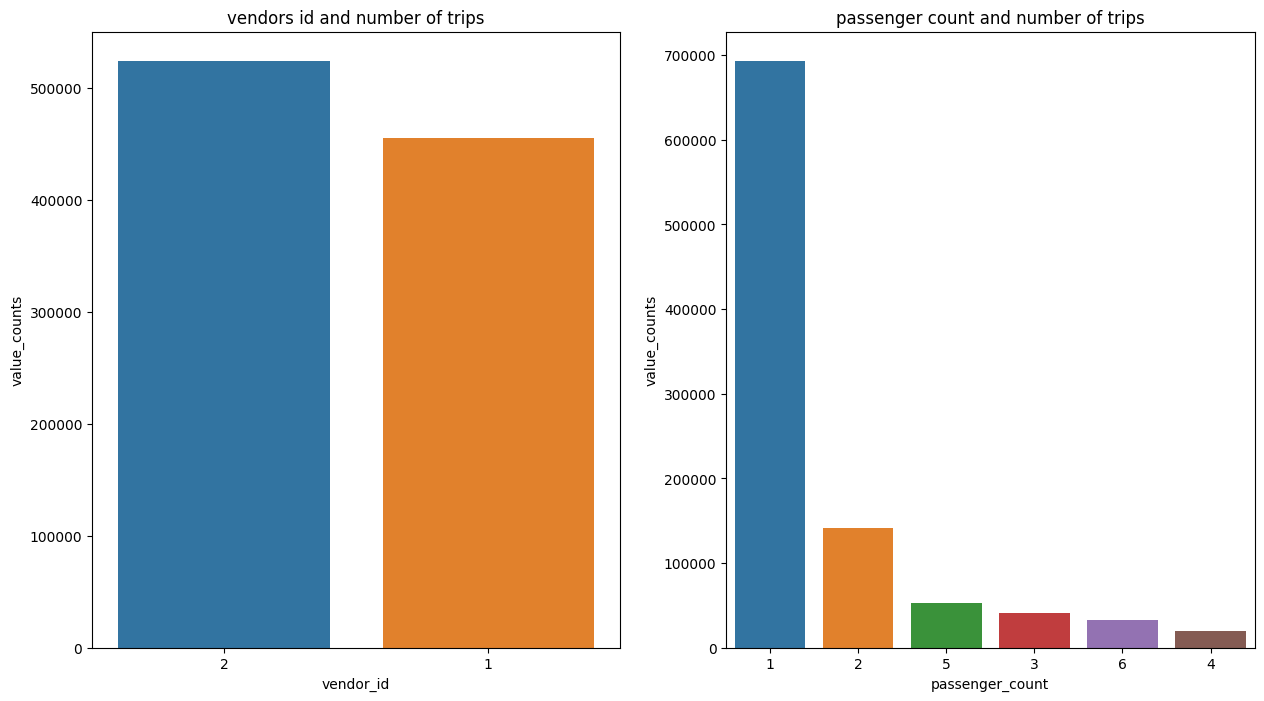

In [22]:
vendor_id['vendor_id'].astype('object',)
passenger_count['passenger_count'].astype('object')

fig,px=plt.subplots(1,2,figsize=(15, 8))
sns.barplot(data=vendor_id,x='vendor_id',y='value_counts',ax=px[0],order=vendor_id['vendor_id']).set(title="vendors id and number of trips")
sns.barplot(data=passenger_count,x='passenger_count',y='value_counts',ax=px[1],order=passenger_count['passenger_count']).set(title="passenger count and number of trips")
plt.show()

<ul>
<li>The vendor id is 2  made more trips</li>
<li>The largest number of trips was the number of rams in it 1, then the next 2<l/i>
<li>can you have some trips that have zero passenger (38 trips) </li>
<li>can you have some trips that have large number  passenger (7 passengers) (2 trips) </li>
</ul>

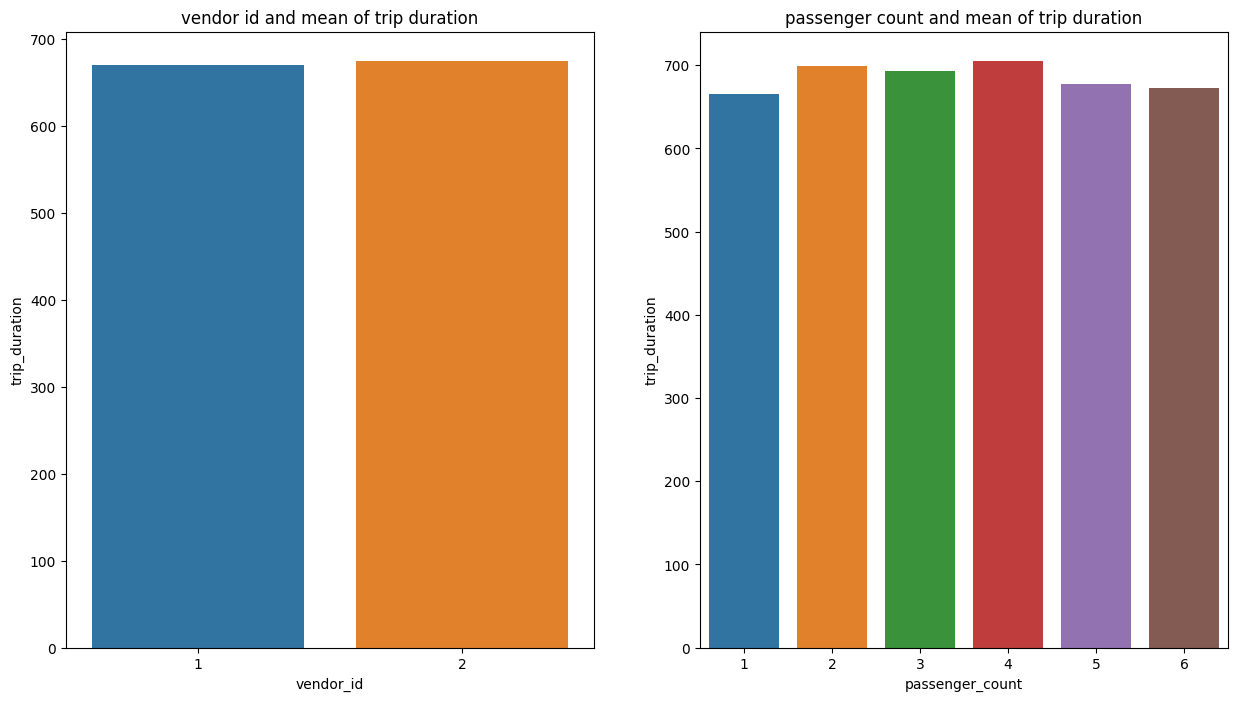

In [23]:
x1=df.groupby('vendor_id',as_index=False)['trip_duration'].median()
x2=df.groupby('passenger_count',as_index=False)['trip_duration'].median()
fig,px=plt.subplots(1,2,figsize=(15, 8))
sns.barplot(data=x1,x='vendor_id',y='trip_duration',ax=px[0]).set(title="vendor id and mean of trip duration")
sns.barplot(data=x2,x='passenger_count',y='trip_duration',ax=px[1]).set(title="passenger count and mean of trip duration")
plt.show()


### analysis continuous  features

In [24]:
continuous_features=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

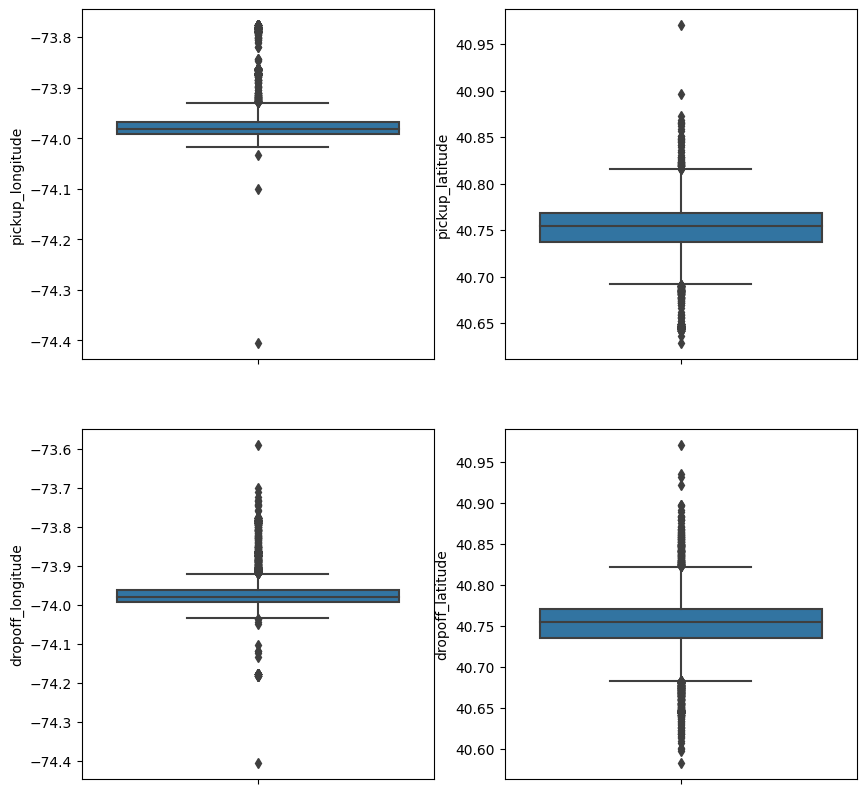

In [25]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
q=0
for i in range(2):
      for j in range(2):
            sns.boxplot(data=df[:10000],y=continuous_features[q],ax=ax[i,j])
            q+=1

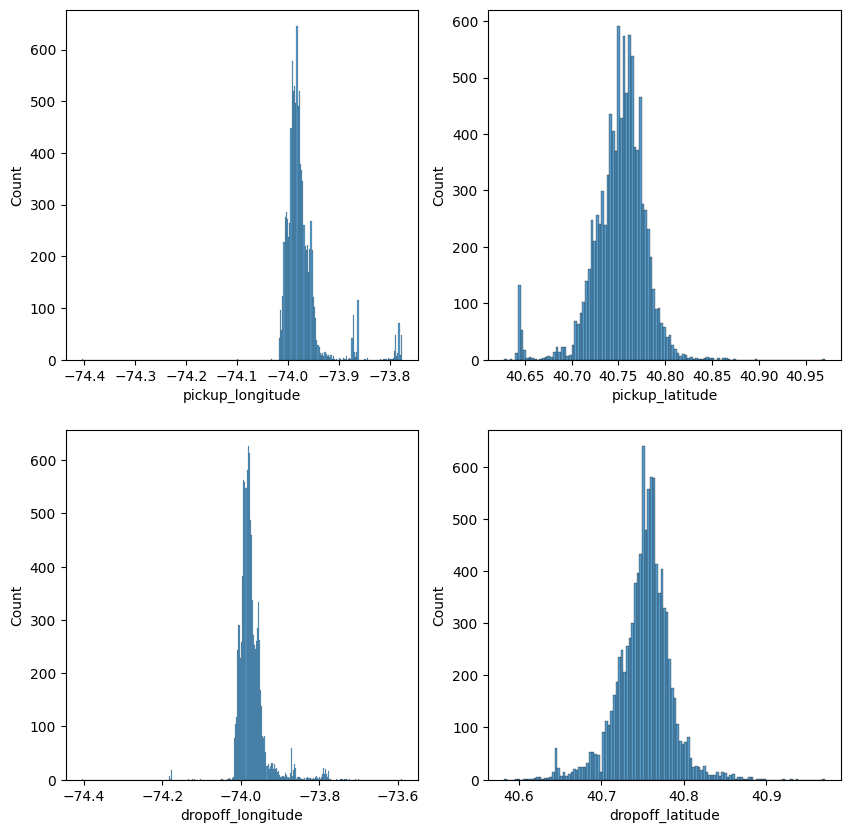

In [26]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
q=0
for i in range(2):
      for j in range(2):
            sns.histplot(data=df[:10000],x=continuous_features[q],ax=ax[i,j])
            q+=1

In [27]:
from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'miles'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kilometers':
        return round(distance * 1.609344, 2)

Through this function, we can calculate the distance between the starting and ending points

In [28]:
df_with_distance=df.copy()
df_with_distance['DistanceBetweenPickup&dropoff']=getDistanceBetweenPointsNew(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])


In [29]:
df_with_distance[['DistanceBetweenPickup&dropoff']].describe()

,DistanceBetweenPickup&dropoff
count,979239.000000
mean,2.173446
std,2.762865
min,0.000000
25%,0.790000
50%,1.330000
75%,2.440000
max,771.030000


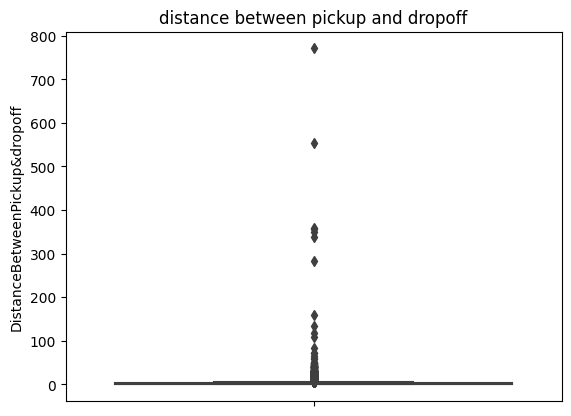

In [30]:
sns.boxplot(data=df_with_distance,y='DistanceBetweenPickup&dropoff')
plt.title("distance between pickup and dropoff")
plt.show()

#### We can see clearly outliers here

In [31]:
#remove outliears to show 
outliers=df_with_distance['DistanceBetweenPickup&dropoff'].quantile(0.99)
df_with_distance_after_remove_outliers=df_with_distance[df_with_distance['DistanceBetweenPickup&dropoff']<=outliers]

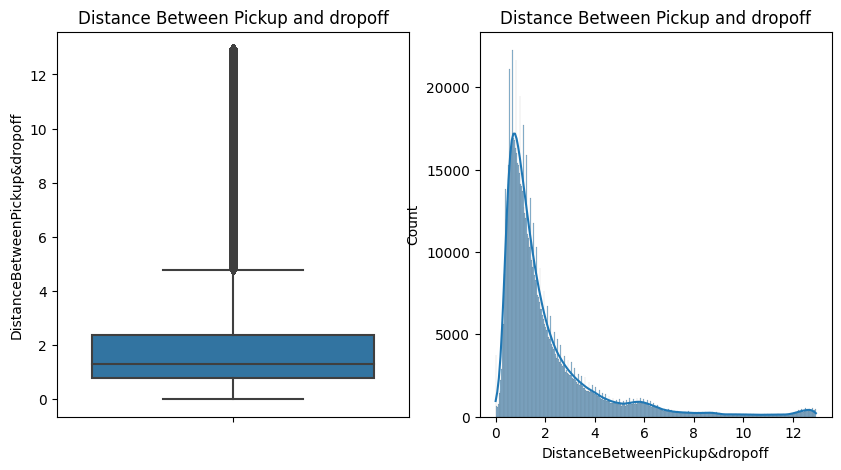

In [32]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df_with_distance_after_remove_outliers,y='DistanceBetweenPickup&dropoff',ax=ax[0]).set(title='Distance Between Pickup and dropoff')
sns.histplot(data=df_with_distance_after_remove_outliers,x='DistanceBetweenPickup&dropoff',ax=ax[1],kde=True).set(title='Distance Between Pickup and dropoff')
plt.show()

<li> Most of the trips, the direct distance between the start and end point was 2 miles</li>

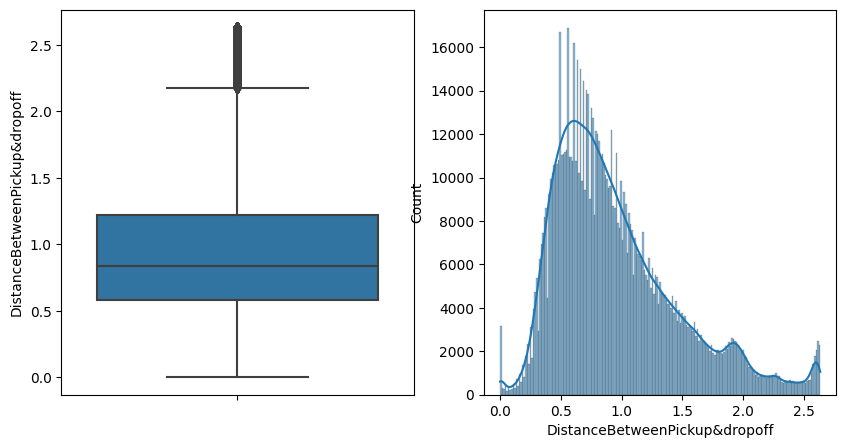

In [33]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
df_with_distance_after_remove_outliers_with_log=np.log1p(df_with_distance_after_remove_outliers['DistanceBetweenPickup&dropoff'])
sns.boxplot(y=df_with_distance_after_remove_outliers_with_log,ax=ax[0])
sns.histplot(x=df_with_distance_after_remove_outliers_with_log,kde=True,ax=ax[1])
plt.show()

<li>after log transformation the distribution transform from positive skew to normal distribution</li>

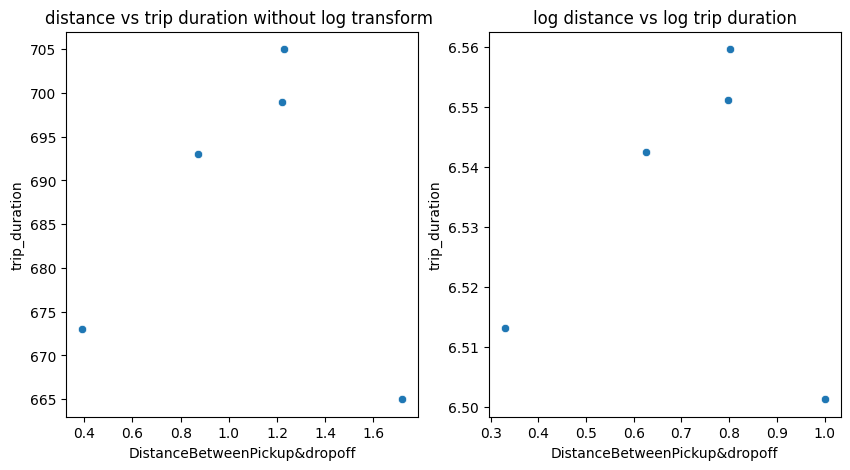

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x=df_with_distance_after_remove_outliers['DistanceBetweenPickup&dropoff'],y=x2['trip_duration'],ax=ax[0]).set(title='distance vs trip duration without log transform ')
sns.scatterplot(x=df_with_distance_after_remove_outliers_with_log,y=np.log1p(x2['trip_duration']),ax=ax[1]).set(title="log distance vs log trip duration")
plt.show()

Text(0.5, 1.0, 'correlation between distance and trip duration ')

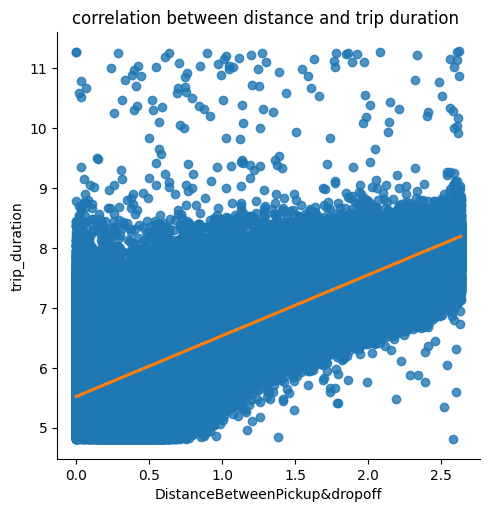

In [39]:
df_with_distance_after_remove_outliers['DistanceBetweenPickup&dropoff']=np.log1p(df_with_distance_after_remove_outliers['DistanceBetweenPickup&dropoff'])
df_with_distance_after_remove_outliers['trip_duration']=np.log1p(df_with_distance_after_remove_outliers['trip_duration'])
sns.lmplot(x='DistanceBetweenPickup&dropoff',y='trip_duration',data=df_with_distance_after_remove_outliers,line_kws={"color": "C1"})
plt.title('correlation between distance and trip duration ')

<strong>Note:</strong><br>
<li>Nothing can be deduced from the resulting figure due to the large  scale of trip duration can apply log transform to reduce scale </li>

### speed

In [44]:
df_with_distance_after_remove_outliers['speed']=df_with_distance_after_remove_outliers_with_log/np.log1p(df_with_distance_after_remove_outliers['trip_duration'])/3600 #mile/hour 

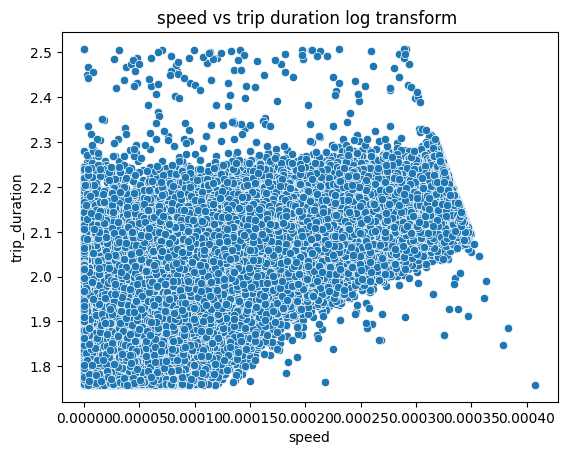

In [45]:
df_with_distance_after_remove_outliers['trip_duration']=np.log1p(df_with_distance_after_remove_outliers['trip_duration'])
df_with_distance_after_remove_outliers['DistanceBetweenPickup&dropoff']=np.log1p(df_with_distance_after_remove_outliers['DistanceBetweenPickup&dropoff'])

sns.scatterplot(x=df_with_distance_after_remove_outliers['speed'],y=df_with_distance_after_remove_outliers['trip_duration']).set(title='speed vs trip duration log transform ')
plt.show()

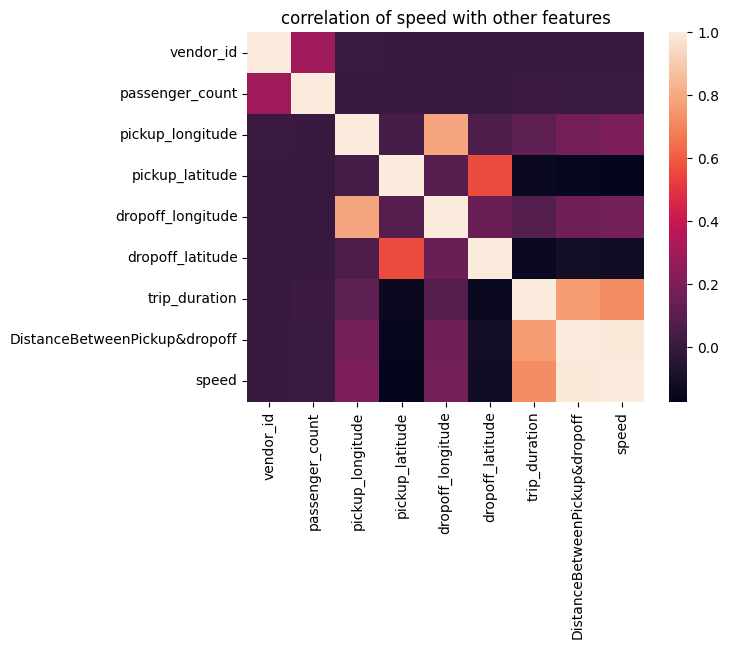

In [48]:
sns.heatmap(df_with_distance_after_remove_outliers.corr())
plt.title("correlation of speed with other features")
plt.show()

## Analysis DateTime features


In [52]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['hour']=df['pickup_datetime'].dt.hour
df['dayofyear']=df['pickup_datetime'].dt.dayofyear
df['dayofweek']=df['pickup_datetime'].dt.dayofweek
df['trip_duration']=np.log1p(q['trip_duration'])
df['dayofweek_name']=df['pickup_datetime'].dt.day_name()


In [53]:
df['is_weekend']=df['dayofweek']>=5


In [56]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df['session'] = pd.cut(df['hour'], bins=b, labels=l, include_lowest=True)

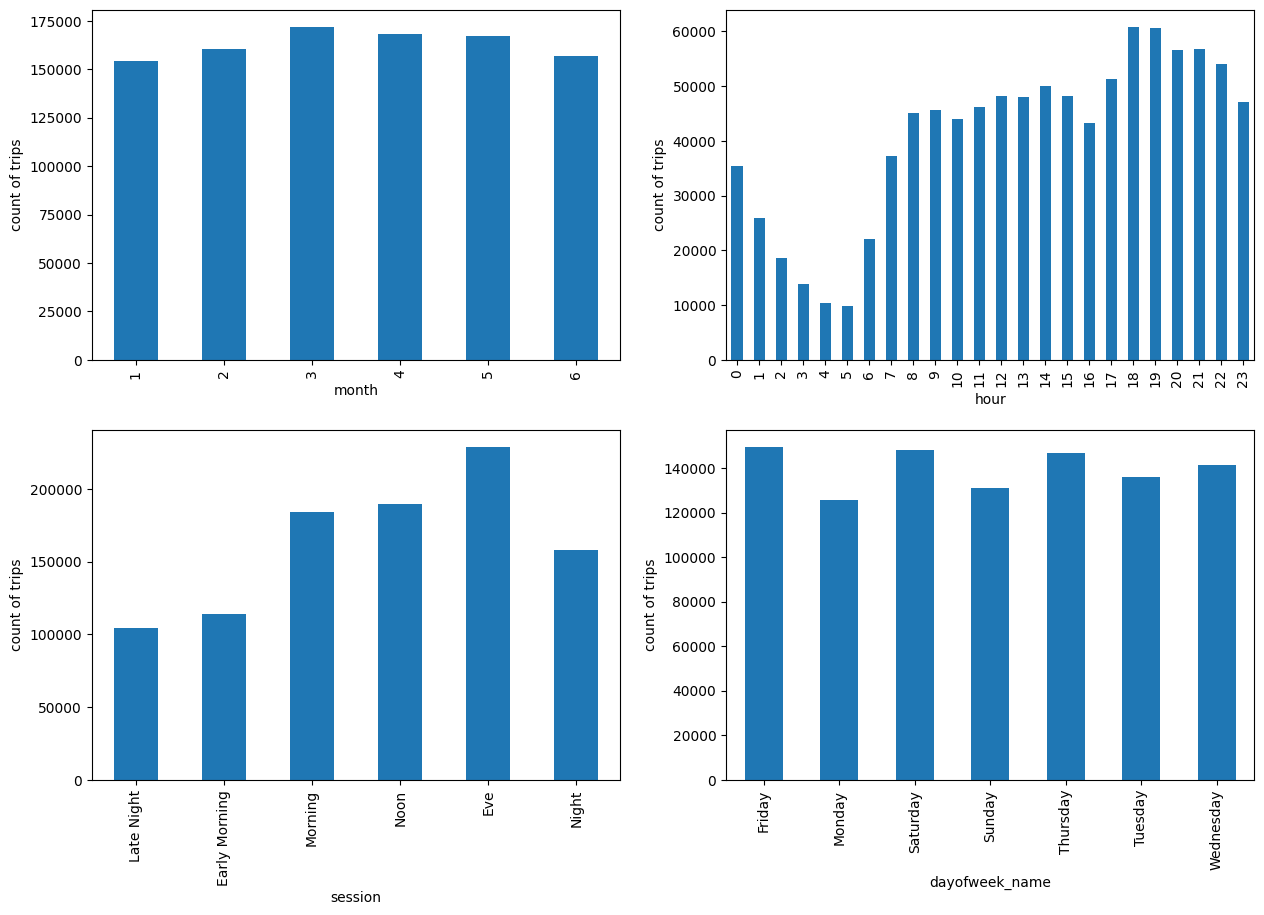

In [57]:
du=['month','hour','session','dayofweek_name']
fig, px=plt.subplots(2,2,figsize=(15, 10))
w=0
for i in range(2):
    for j in range(2):
        q1=df.groupby(df[du[w]])['trip_duration'].count()
        q1.plot(kind='bar',ax=px[i,j])
        px[i,j].set_ylabel("count of trips")
        w+=1
    

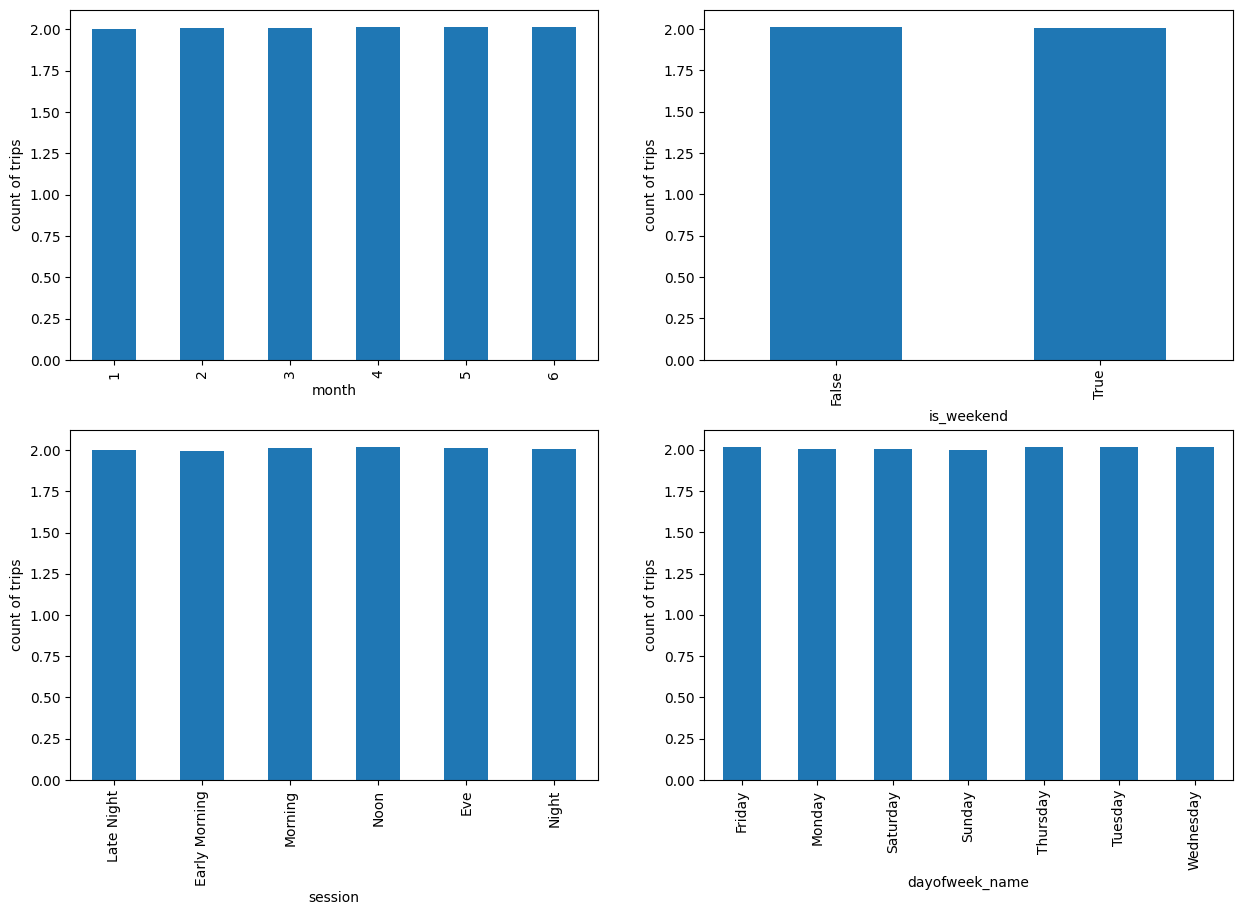

In [58]:
du=['month','is_weekend','session','dayofweek_name']
fig, px=plt.subplots(2,2,figsize=(15, 10))
w=0
for i in range(2):
    for j in range(2):
        q1=df.groupby(df[du[w]])['trip_duration'].mean()
        q1.plot(kind='bar',ax=px[i,j])
        px[i,j].set_ylabel("count of trips")
        w+=1

### Analysis with Speed 

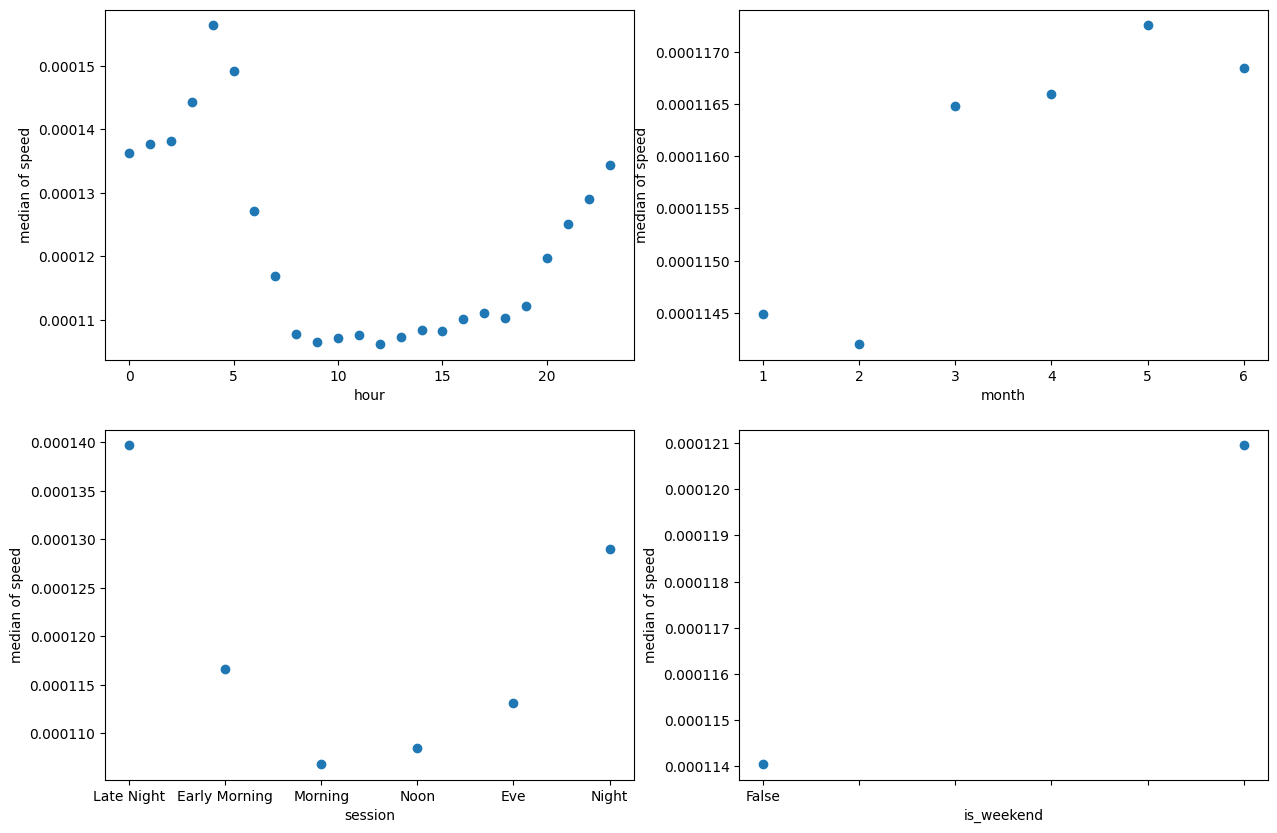

In [59]:
df['speed']=df_with_distance_after_remove_outliers['speed']
du=['hour','month','session','is_weekend']
fig, px=plt.subplots(2,2,figsize=(15, 10))
w=0
for i in range(2):
    for j in range(2):
        q1=df.groupby(df[du[w]])['speed'].median()
        q1.plot(style='o',ax=px[i,j])
        px[i,j].set_ylabel("median of speed")
        w+=1
    

## analysis target features

In [60]:
df['trip_duration'].describe()

count    979338.000000
mean          2.011410
std           0.093693
min           1.758551
25%           1.948563
50%           2.016665
75%           2.078108
max           2.507900
Name: trip_duration, dtype: float64

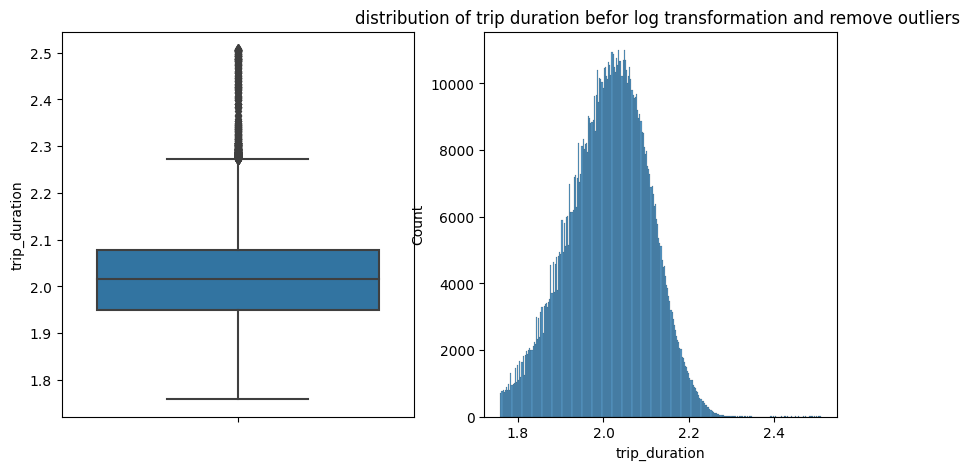

In [61]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(y=df['trip_duration'],ax=ax[0])
sns.histplot(x=df['trip_duration'],ax=ax[1])
plt.title('distribution of trip duration befor log transformation and remove outliers ')
plt.show()

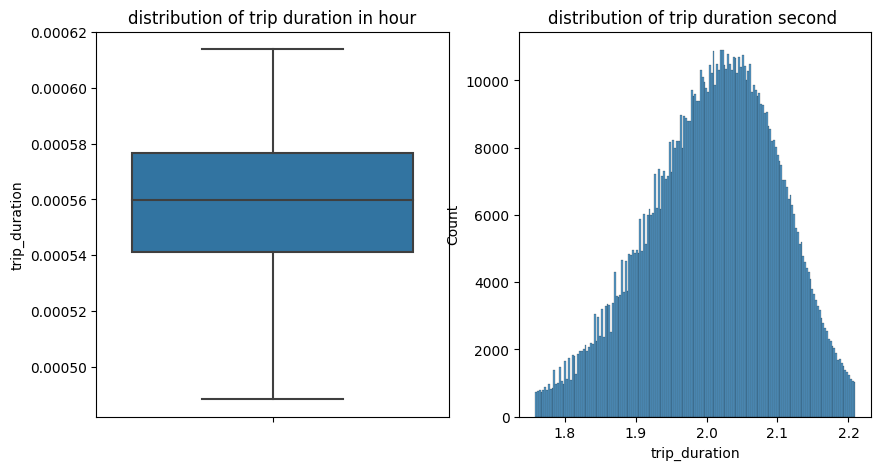

In [62]:
x=df['trip_duration'].quantile(0.99)
x2=df[df['trip_duration']<=x]
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(y=x2['trip_duration']/3600,ax=ax[0]).set(title='distribution of trip duration in hour')
sns.histplot(x=x2['trip_duration'],ax=ax[1])
plt.title('distribution of trip duration second ')
plt.show()

<strong>Note:</strong><br>
<li>The average trip is 20 minutes, with extreme values and values far from the average </li>
<li>trip duration has positive skew  </li>

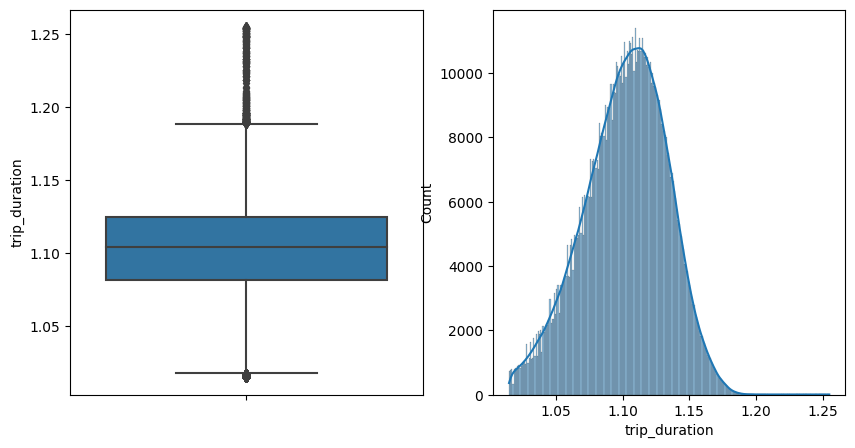

In [63]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(y=np.log1p(df['trip_duration']),ax=ax[0])
sns.histplot(x=np.log1p(df['trip_duration']),ax=ax[1],kde=True)
plt.show()

<li>after log transformation the distribution transform from positive skew to normal distribution</li>

## add new feature from The Open Source Routing Machine (OSRM) dataset 

In [68]:
osrm_part1=pd.read_csv(r"D:\Data Science\course_ML_mostafa_saad\projects\project-taxi-trip-duration\datasets\fastest_routes_train_part_1.csv")
osrm_part2=pd.read_csv(r"D:\Data Science\course_ML_mostafa_saad\projects\project-taxi-trip-duration\datasets\fastest_routes_train_part_2.csv")

In [69]:
osrm_part1.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


There are many columns that can help him predict like total_distance,total_travel_time,number_of_steps 
 You can also verify this by merging with the main dataset by column ID

In [70]:
#1st merge two parts
osrm=osrm_part1.append(osrm_part2,ignore_index=True)

In [71]:
osrm.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [72]:
osrm.describe()

,total_distance,total_travel_time,number_of_steps
count,1.458643e+06,1.458643e+06,1.458643e+06
mean,4.626383e+03,3.893719e+02,7.547126e+00
std,5.303878e+03,3.144679e+02,4.432504e+00
min,0.000000e+00,0.000000e+00,2.000000e+00
25%,1.666100e+03,1.815000e+02,5.000000e+00
50%,2.755100e+03,2.895000e+02,6.000000e+00
75%,5.113800e+03,4.907000e+02,9.000000e+00
max,9.420420e+04,5.135400e+03,4.600000e+01


In [73]:
osrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458643 entries, 0 to 1458642
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1458643 non-null  object 
 1   starting_street       1458643 non-null  object 
 2   end_street            1458643 non-null  object 
 3   total_distance        1458643 non-null  float64
 4   total_travel_time     1458643 non-null  float64
 5   number_of_steps       1458643 non-null  int64  
 6   street_for_each_step  1458643 non-null  object 
 7   distance_per_step     1458643 non-null  object 
 8   travel_time_per_step  1458643 non-null  object 
 9   step_maneuvers        1458643 non-null  object 
 10  step_direction        1458643 non-null  object 
 11  step_location_list    1458643 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 133.5+ MB


In [85]:
#2st merge total_distance,total_travel_time,number_of_steps with main dataset 
df=df.merge(osrm[[ 'id','total_distance','total_travel_time','number_of_steps' ]],on='id',how='left')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979338 entries, 0 to 979337
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  979338 non-null  object        
 1   vendor_id           979338 non-null  int64         
 2   pickup_datetime     979338 non-null  datetime64[ns]
 3   dropoff_datetime    979338 non-null  object        
 4   passenger_count     979338 non-null  int64         
 5   pickup_longitude    979338 non-null  float64       
 6   pickup_latitude     979338 non-null  float64       
 7   dropoff_longitude   979338 non-null  float64       
 8   dropoff_latitude    979338 non-null  float64       
 9   store_and_fwd_flag  979338 non-null  object        
 10  trip_duration       979338 non-null  int64         
 11  total_distance      979338 non-null  float64       
 12  total_travel_time   979338 non-null  float64       
 13  number_of_steps     979338 no

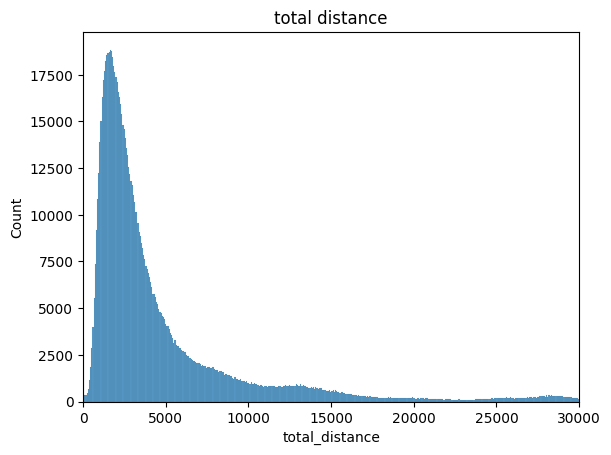

In [90]:
osrm_columns=['total_distance','total_travel_time','number_of_steps']
sns.histplot(df[osrm_columns[0]])
plt.xlim(0,30000)
plt.title('total distance')

plt.show()

total_distance has negative skew<br>
most distance is between 0 and 5000 metre

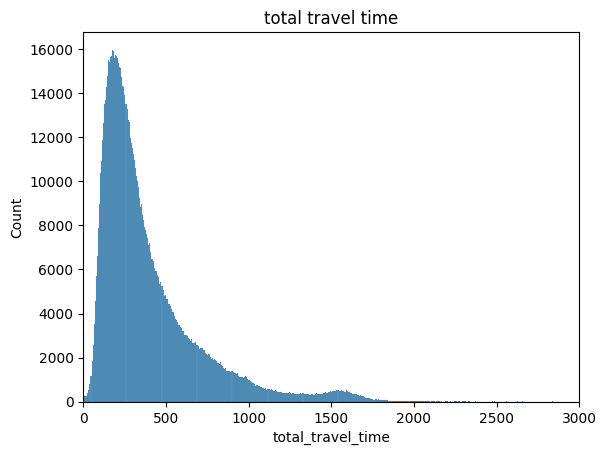

In [91]:
sns.histplot(df[osrm_columns[1]])
plt.xlim(0,3000)
plt.title('total travel time')
plt.show()


total travel time has negative skew<br>
most distance is between 0 and 1000 second

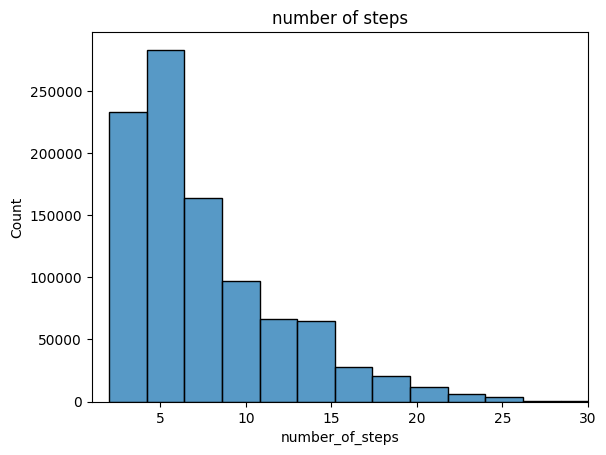

In [92]:
sns.histplot(df[osrm_columns[2]],bins=20)
plt.xlim(1,30)
plt.title('number of steps')
plt.show()


number of steps time has negative skew<br>
most values  is between 1 and 10 steps

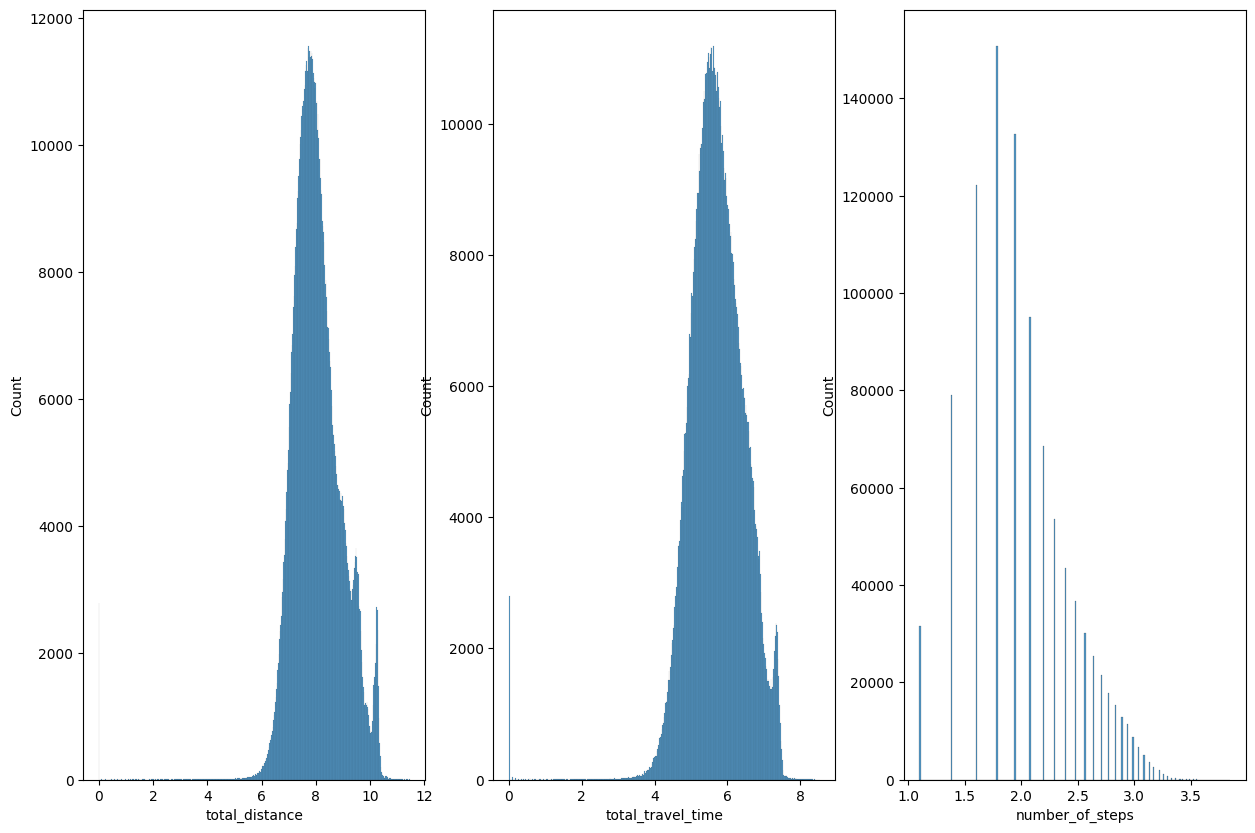

In [93]:
du=['total_distance','total_travel_time','number_of_steps']
fig, px=plt.subplots(1,3,figsize=(15, 10))
w=0
for j in range(3):
   
        sns.histplot(np.log1p((df[du[w]])),ax=px[j],)
                        
        w+=1

### The relationship of the three columns ('total_distance','total_travel_time','number_of_steps') with target column (trip_duration)

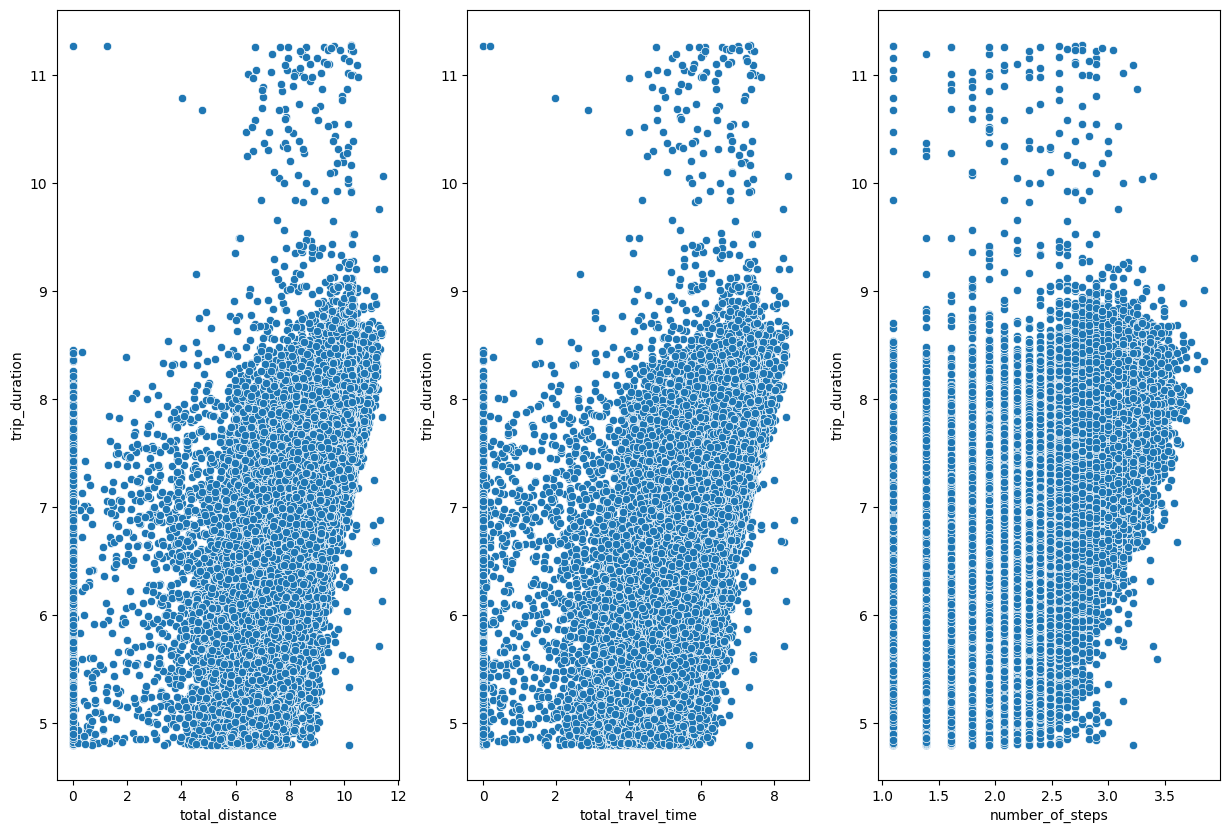

In [94]:
du=['total_distance','total_travel_time','number_of_steps']
fig, px=plt.subplots(1,3,figsize=(15, 10))
w=0
for j in range(3):   
        sns.scatterplot(np.log1p(df[du[w]]),np.log1p(df['trip_duration']),ax=px[j],) 
        w+=1

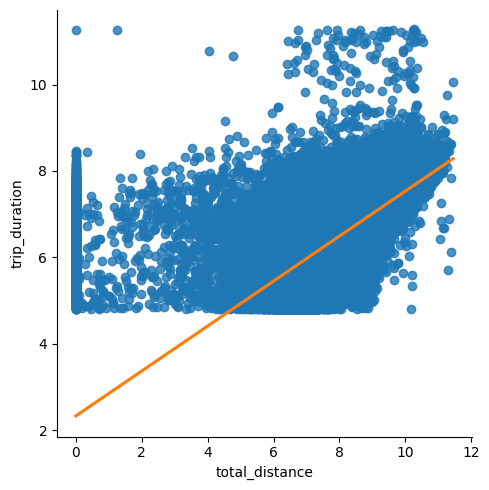

In [95]:
df["total_distance"]=np.log1p(df["total_distance"])
df["trip_duration"]=np.log1p(df["trip_duration"])
sns.lmplot(x="total_distance", y="trip_duration", data=df,line_kws={"color": "C1"});

<Axes: >

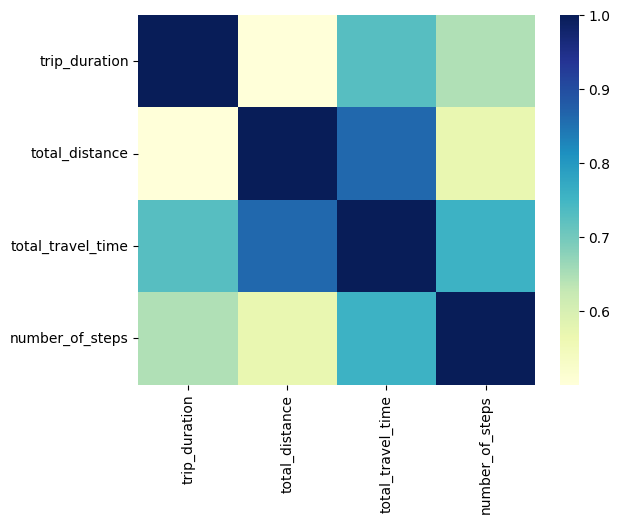

In [97]:
df["total_travel_time"]=np.log1p(df["total_travel_time"])
df["number_of_steps"]=np.log1p(df["number_of_steps"])
df["total_distance"]=np.log1p(df["total_distance"])
df["trip_duration"]=np.log1p(df["trip_duration"])
sns.heatmap(df[['trip_duration','total_distance','total_travel_time','number_of_steps']].corr(),cmap="YlGnBu")

## Add new feature from weather data NYC dataset 

In [76]:
url=r"D:\Data Science\course_ML_mostafa_saad\projects\project-taxi-trip-duration\datasets\weather_data_nyc_centralpark_2016(1).csv"

In [77]:
wether = pd.read_csv(rf"{url}")
wether['snow depth'].replace("T", "1", inplace=True)
wether['snow fall'].replace("T", "1", inplace=True)
wether['precipitation'].replace("T", "1", inplace=True)
wether['snow depth'] = wether['snow depth'].astype('float64')
wether['snow fall'] = wether['snow fall'].astype('float64')
wether['precipitation'] = wether['precipitation'].astype('float64')
wether.drop('date', axis=1, inplace=True)
df['dayofyear']=df['pickup_datetime'].dt.dayofyear
x = pd.merge(df, wether, on='dayofyear')

In [78]:
x.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,dayofyear,dayofweek,dayofweek_name,is_weekend,session,speed,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,2.072912,6,8,7,160,2,Wednesday,False,Early Morning,0.000134,67,52,59.5,0.45,0.0,0.0
1,id2885693,1,2016-06-08 21:11:45,2016-06-08 22:03:34,1,-73.966011,40.790024,-74.002197,40.742065,N,2.201922,6,8,21,160,2,Wednesday,False,Night,0.000198,67,52,59.5,0.45,0.0,0.0
2,id2537758,1,2016-06-08 11:11:31,2016-06-08 11:17:08,1,-74.007980,40.732349,-73.998886,40.733234,N,1.920306,6,8,11,160,2,Wednesday,False,Morning,0.000057,67,52,59.5,0.45,0.0,0.0
3,id1393747,1,2016-06-08 02:47:37,2016-06-08 02:54:17,1,-73.908630,40.774769,-73.906433,40.759869,N,1.945047,6,8,2,160,2,Wednesday,False,Late Night,0.000102,67,52,59.5,0.45,0.0,0.0
4,id0866387,1,2016-06-08 16:22:27,2016-06-08 16:46:07,1,-74.012177,40.707348,-73.985573,40.755512,N,2.111318,6,8,16,160,2,Wednesday,False,Noon,0.000201,67,52,59.5,0.45,0.0,0.0


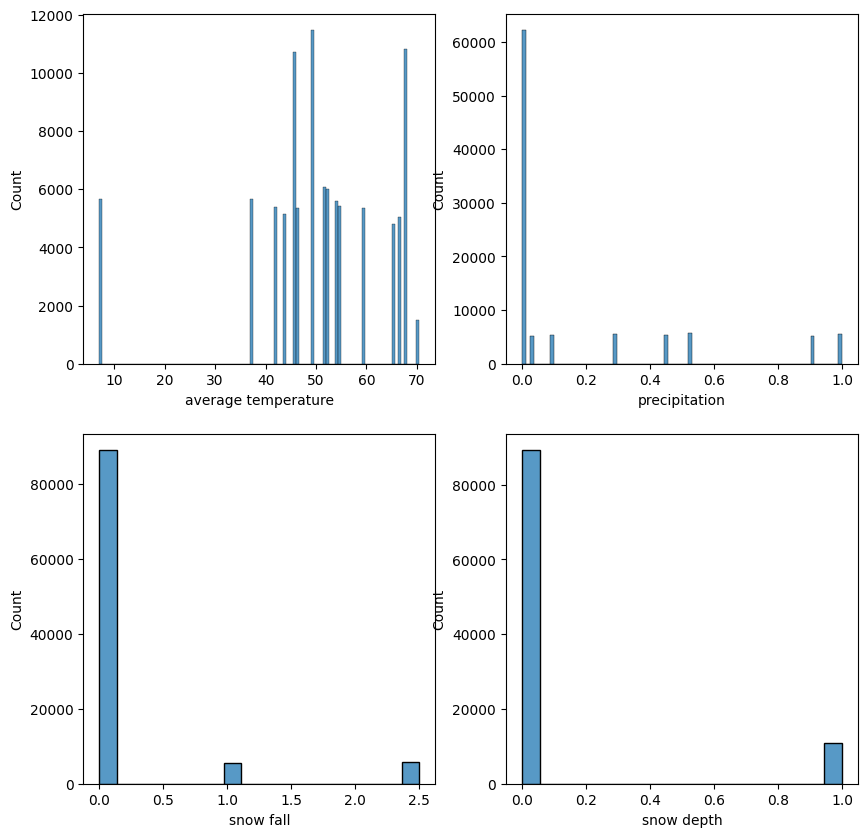

In [79]:
weather_features=['average temperature','precipitation','snow fall','snow depth']
fig,ax=plt.subplots(2,2,figsize=(10,10))
q=0
for i in range(2):
      for j in range(2):
            sns.histplot(data=x[:100000],x=weather_features[q],ax=ax[i,j])
            q+=1

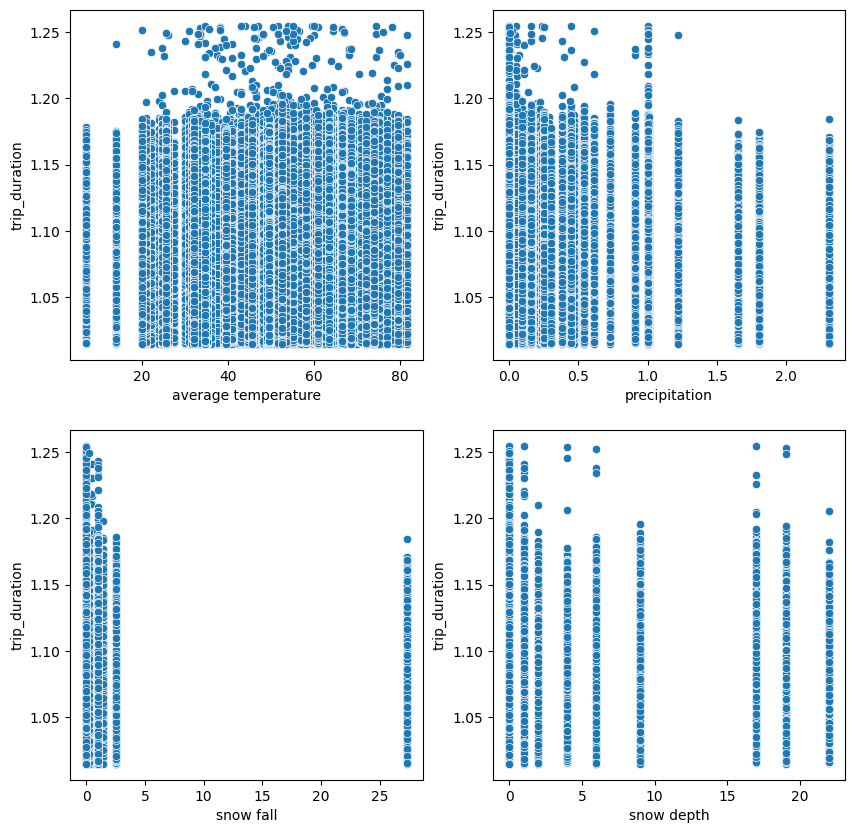

In [80]:
weather_features=['average temperature','precipitation','snow fall','snow depth']
fig,ax=plt.subplots(2,2,figsize=(10,10))
q=0
for i in range(2):
      for j in range(2):
            sns.scatterplot(x[weather_features[q]],np.log1p(x['trip_duration']),ax=ax[i,j])
            q+=1